In [364]:
#importación de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

pd.set_option('display.max_columns', None) #para que muestre todas las columnas

In [365]:
#lectura de archivos csv y creación de dataframes

df_flight = pd.read_csv('Customer Flight Activity.csv')
df_loyalty = pd. read_csv('Customer Loyalty History.csv')

In [366]:
#vista inicial de los datos de df_flight

df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [367]:
#informacioón de los datos de df_flight

df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [368]:
#creación de una función para buscar valores nulos y calcular porcentaje de nulos

def buscar_nulos_percent(nombre_df):
    """
    Función que busca los valores nulos y muestra el porcentaje de nulos
    """
    nulos = nombre_df.isnull().sum()
    porcentaje_nulos = (nulos/len(nombre_df))*100
    return porcentaje_nulos

In [369]:
buscar_nulos_percent(df_flight) #no hay valores nulos en este df

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [370]:
#este df tiene una cantidad alta de filas duplicadas

df_flight.duplicated().sum()

np.int64(1864)

In [371]:
#vemos que muchos Loyalty Numbers están repetidos

df_flight['Loyalty Number'].value_counts()


Loyalty Number
678205    72
499874    48
411734    48
255475    48
528447    48
          ..
100590    24
100642    24
100644    24
100646    24
999891    24
Name: count, Length: 16737, dtype: int64

In [372]:
#Explorar la naturaleza de los datos repetidos. Se ven filas duplicadas (para drop) y filas con datos diferentes pero el mismo Loyalty Number (para mantener)

loyalty_678205   = df_flight[df_flight['Loyalty Number'] == 678205 ]
loyalty_678205 


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
10862,678205,2017,1,0,0,0,0,0.0,0,0
10863,678205,2017,1,0,0,0,0,0.0,0,0
10864,678205,2017,1,0,0,0,0,0.0,0,0
27763,678205,2017,2,0,0,0,0,0.0,0,0
27764,678205,2017,2,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
382684,678205,2018,11,11,0,11,1177,117.0,0,0
382685,678205,2018,11,8,1,9,1341,134.0,0,0
399585,678205,2018,12,0,0,0,0,0.0,0,0
399586,678205,2018,12,0,0,0,0,0.0,0,0


In [373]:
#vista inicial de los datos de df_loyalty

df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [374]:
#información de los datos de df_loyalty

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [375]:
buscar_nulos_percent(df_loyalty) #hay 3 columnas con nulos en este df, hay que evaluar si elimiar o imputar

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [376]:
#este df no tiene filas dupllicadas

df_loyalty.duplicated().sum()

np.int64(0)

In [408]:
#hacer el merge de los dos dataframes, mantienendo todas las filas de df_flight, usando Loyalty Number como llave

df = df_flight.merge(df_loyalty,on = "Loyalty Number", how="left") #left join to keep all the rows of df_flight
df.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


## Exploración General del DataFrame despues de unir las tablas

In [ ]:
df.shape #el df resultante tiene 405624 filas y 25 columnas

(405624, 25)

In [410]:
#evaluación de valores nulos

buscar_nulos_percent(df)

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [411]:
df['Loyalty Number'].value_counts() #hay Loyalty Numbers repetidos

Loyalty Number
678205    72
499874    48
411734    48
255475    48
528447    48
          ..
100590    24
100642    24
100644    24
100646    24
999891    24
Name: count, Length: 16737, dtype: int64

In [412]:
loyalty_678205  = df[df['Loyalty Number'] == 678205 ] #para visualizar como se ven los datos de un Loyalty Number. Hay meses repetidos pero no son todos filas enteras repetidas
loyalty_678205 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10862,678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
10863,678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
10864,678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
27763,678205,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
27764,678205,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382684,678205,2018,11,11,0,11,1177,117.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
382685,678205,2018,11,8,1,9,1341,134.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
399585,678205,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
399586,678205,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN


In [413]:
df.describe().T #resumen stats de columnas numéricas    

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


In [414]:
df.describe(include='object').T #resumen stats de columnas categóricas

,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

## Limpieza
- Eliminar columnas Cancellation Month y Cancellation year (debido al porcentaje de nulos)
- imputar los nulos en la columna (salario)
- Evaluar salarios en negativo
- eliminar duplicados
- Cambiar digitos a nombre de mes


In [ ]:
df.duplicated().sum() #ver conteo de filas du0plicados

np.int64(1864)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum() #drop y comprobamos que se eliminaron las filas duplicadas

np.int64(0)

In [ ]:
drop_columns= ['Cancellation Year', 'Cancellation Month'] #eliminar columnas con 87% de nulos

df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
df.shape #comprobamos que se eliminaron 1864 filas y 2 columnas con respecto al shape anterior del df justo despues del merge

(403760, 23)

In [424]:
df_salaries = np.sort(df['Salary'].unique()) #para ver los valores únicos de la columna Salary, para identificar valores negativos

df_salaries

array([-58486., -57297., -49830., ..., 397919., 407228.,     nan],
      shape=(5891,))

In [ ]:
df['Salary'] = df['Salary'].abs() #cambiar los valores negativos a positivos

df_salaries = np.sort(df['Salary'].unique()) #comprobar que se han cambiado los valores negativos

df_salaries

array([  9081.,  10605.,  12497., ..., 397919., 407228.,     nan],
      shape=(5891,))

In [391]:
#para tratar los nulos en salary: hay un 25% de nulos. Opto por tratar con Iterative Imputer.

imputer = IterativeImputer(max_iter=100, random_state=42)
df['Salary'] = imputer.fit_transform(df[['Salary']])

In [392]:
buscar_nulos_percent(df) #ya no hay nulos en Salary

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
dtype: float64

In [ ]:
# Crea un diccionario para mapear los valores.
diccionario_meses = {
    1: "January",  2: "February",  3: "March",     4: "April",
    5: "May",      6: "June",      7: "July",      8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"}


columns_to_map = ["Month", "Enrollment Month"]  # crear lista de las columnas a transformar

df[columns_to_map] = df[columns_to_map].replace(diccionario_meses)


# Muestra los valores únicos de la columna 'Month' trás realizar el cambio.
df['Month'].unique()


array(['January', 'September', 'February', 'March', 'November', 'April',
       'May', 'July', 'June', 'August', 'October', 'December'],
      dtype=object)

In [394]:
# Muestra los valores únicos de la columna 'Enrollment Month' trás realizar el cambio.

df['Enrollment Month'].unique()

array(['August', 'March', 'July', 'January', 'September', 'May',
       'October', 'February', 'April', 'June', 'November', 'December'],
      dtype=object)

## Fase 2: Visualización

1.  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

El gráfico abajo traza la tendencia de vuelos reservados en cada mes del año. Suma el número total de vuelvos reservados en cada mes (ej. enero 2017 y enero 2018 sumado). Se observa un pico en julio, y otro menos acentuado en diciembre. Será que la gente viaja en estos meses?

In [395]:
df_flights_month = df.groupby(['Month'])['Flights Booked'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convertir 'Month' al tipo categorical con el order especificado
df_flights_month['Month'] = pd.Categorical(df_flights_month['Month'], 
                                           categories=month_order, ordered=True)

# Ordenar df según categorical Month order
df_flights_month = df_flights_month.sort_values('Month')

df_flights_month

,Month,Flights Booked
4,January,96936
3,February,96334
7,March,131199
0,April,112511
8,May,142170
6,June,173242
5,July,193431
1,August,169204
11,September,136379
10,October,129461


Text(0.5, 1.0, 'Flights Booked by Month')

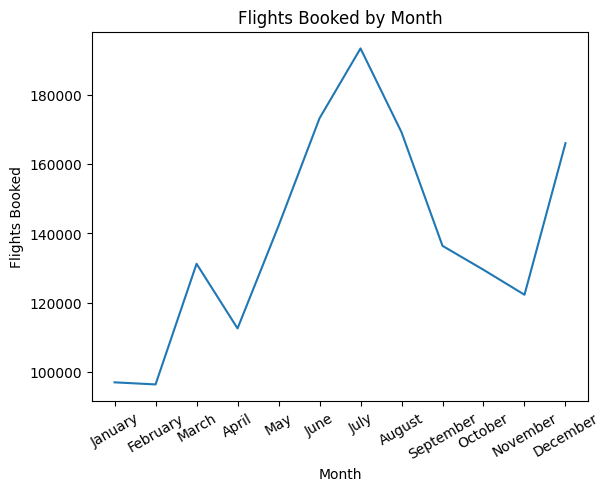

In [ ]:
sns.lineplot(data=df_flights_month, x='Month', y='Flights Booked') #plot de la cantidad de vuelos reservados por mes, lineplot es bueno para series temporales
plt.tick_params(axis='x', rotation=30)
plt.title('Flights Booked by Month')

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

El gráfico abajo muestra una fuerte correlación positiva entre la distancia del vuelo y los puntos acumulados. Esta observación va avalada por la tabla a continuación que muestra el coeficiente de correlación por encima de .99. 

Text(0.5, 1.0, 'Distance vs. Points Accumulated')

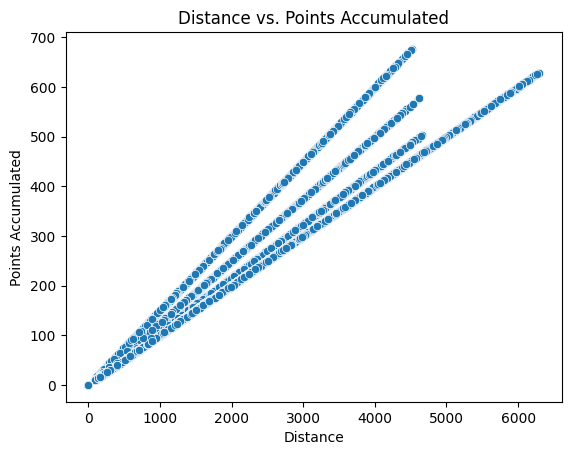

In [397]:
sns.scatterplot(data=df, x='Distance', y='Points Accumulated')
plt.title('Distance vs. Points Accumulated')

In [398]:
df[["Distance", "Points Accumulated"]].corr()

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


3. ¿Cuál es la distribución de los clientes por provincia o estado?

El gráfico abajo demuestra la distribución por provincia. Predomina Ontario, British Columbia y Quebec. 

In [ ]:
# Agrupar por Provincia y sumar Loyalty Nyumber con nunique y no size para contar solo una vez los Loyalty Numbers repetidos
df_province = df.groupby('Province')['Loyalty Number'].nunique().reset_index()

df_province.columns = ["Province", "conteo"] #nombro los headers que quiero ver

df_province_sorted= df_province.sort_values(by='conteo', ascending=False)

df_province_sorted


,Province,conteo
6,Ontario,5404
1,British Columbia,4409
8,Quebec,3300
0,Alberta,969
2,Manitoba,658
3,New Brunswick,636
5,Nova Scotia,518
9,Saskatchewan,409
4,Newfoundland,258
10,Yukon,110


Text(0.5, 1.0, 'Number of Clients by Province')

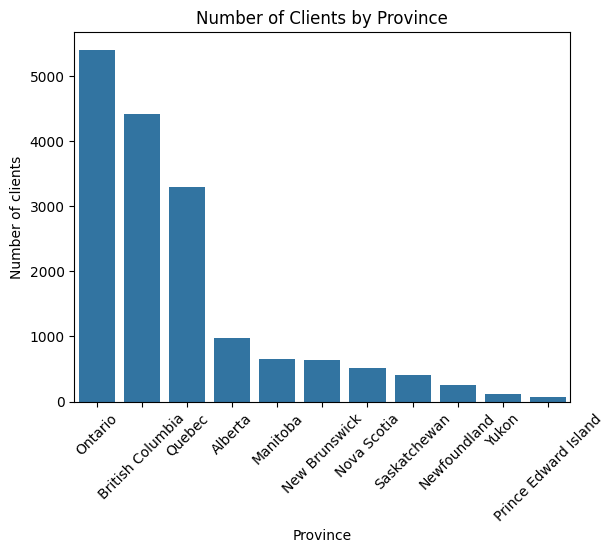

In [400]:
sns.barplot(data=df_province, x='Province', y ='conteo', order=df_province_sorted['Province'])
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Number of clients')
plt.title('Number of Clients by Province')

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Hay una relación clara y positiva entre el nivel de educación del cliente y el salario promedio, con una pequeña variación entre College y Bachelor. 

In [401]:
#visualizar los valores de la columna Education

df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

Text(0.5, 1.0, 'Level of Education vs. Salary')

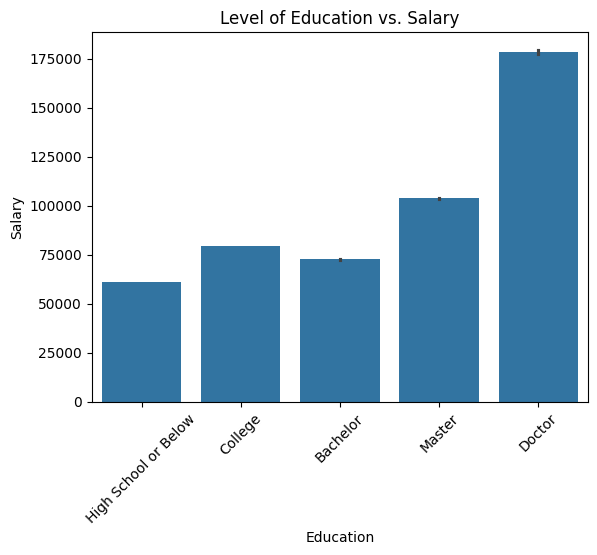

In [402]:
order_education = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

sns.barplot(data=df, x='Education', y='Salary', order=order_education)
plt.tick_params(axis='x', rotation=45)
plt.title('Level of Education vs. Salary')

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Se puede ver en el pie chart abajo:

Nova: 33.9%

Aurora: 20.5%

Star:45.6%

In [ ]:
# Group by 'Loyalty Card' and count unique 'Loyalty Number' values
df_fidelidad = df.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index()

# Renombrar las columnas que quiero ver.
df_fidelidad.columns = ['Loyalty Card', 'conteo']

df_fidelidad


,Loyalty Card,conteo
0,Aurora,3429
1,Nova,5671
2,Star,7637


Text(0.5, 1.0, 'Percentage of Clients with Each Type of Loyalty Card')

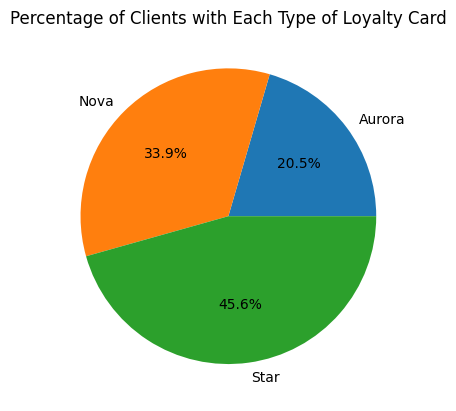

In [404]:
plt.pie(df_fidelidad['conteo'], labels=df_fidelidad['Loyalty Card'], autopct='%1.1f%%')
plt.title('Percentage of Clients with Each Type of Loyalty Card')

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Muestro los resultados gráficamente para ver tendencias, como por ejemplo, la gran mayoria de clientes, tanto mujeres como hombres, están casados. La distribución entre casados, solteros, y divoricados es muy parecido entre los géneros. Estas observaciones van avaladas por los porcentajes mostrados en la tabla después del gráfico, que muestra el porcentaje de clientes por género y estado civil. Por ejemp`lo, de todos los clientes, un 7.58% son mujeres divorciadas.

In [405]:
df_dist_clientes = df.groupby(['Gender', 'Marital Status'])['Loyalty Number'].nunique().reset_index()

df_dist_clientes.columns = ['Gender', 'Marital Status', 'Count']

df_dist_clientes

,Gender,Marital Status,Count
0,Female,Divorced,1269
1,Female,Married,4869
2,Female,Single,2272
3,Male,Divorced,1249
4,Male,Married,4866
5,Male,Single,2212


Text(0, 0.5, 'Number of Clients')

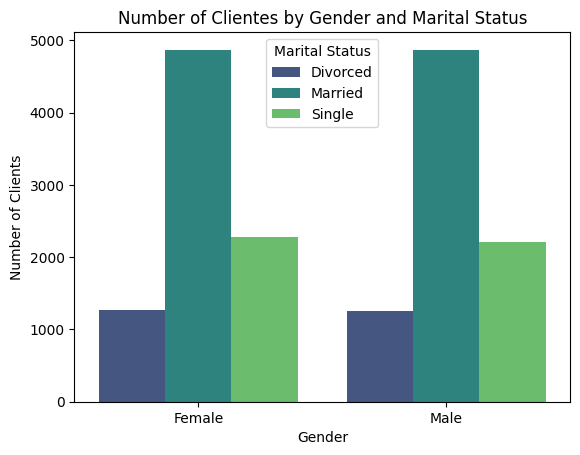

In [426]:
sns.barplot(data=df_dist_clientes, x='Gender', y='Count', hue='Marital Status', palette='viridis')

# Add title and labels
plt.title('Number of Clientes by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')




In [ ]:
crosstab_gender_marital = pd.crosstab(index=df['Gender'], 
                              columns=df['Marital Status'], 
                              values=df['Loyalty Number'], 
                              aggfunc='nunique', normalize=True)*100 


crosstab_gender_marital 


Marital Status,Divorced,Married,Single
Gender,,,
Female,7.582004,29.091235,13.574715
Male,7.462508,29.073311,13.216228


## BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:

1.Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.

2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo.

3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
#1. Preparación de los datos

df_filtered = df[['Education', 'Flights Booked']]

df_filtered = df_filtered[df_filtered['Flights Booked'] != 0]

df_filtered


,Education,Flights Booked
0,Bachelor,3
1,College,10
2,College,6
8,Bachelor,6
10,Bachelor,3
...,...,...
405612,Doctor,15
405613,College,14
405614,Bachelor,11
405616,College,1


Análisis Descriptivo

In [ ]:
df_filtered.groupby('Education')['Flights Booked'].agg(['count', 'mean', 'median', 'std', 'var', 'min', 'max'])


,count,mean,median,std,var,min,max
Education,,,,,,,
Bachelor,129303,8.028607,8.0,4.669000,21.799564,1,21
College,52834,8.070523,8.0,4.667465,21.785233,1,21
Doctor,9193,8.053519,8.0,4.697898,22.070242,1,21
High School or Below,9855,8.015525,8.0,4.680893,21.910760,1,21
Master,6447,8.005894,8.0,4.620198,21.346227,1,21


## Prueba Estadística

Resumen resultados: 

Prueba normalidad: Ninguno de los 5 grupos tiene una distribución normal.

Prueba varianza: Todas las combinaciones tiene una varianza homogénea, excepto College y Bachelor: Varianzas no homogéneas (p=0.00273446183779272)

Prueba de hipotesis: Las combinaciones con una diferencia significativa son: Bachelor con Master, College con Bachelor, y High School or Below con Bachelor



1. Test de normalidad: 

H0: No hay diferencia en el número de vuelos reservados entre los diferentes niveles de educación.

H1: Hay diferencia en el número de vuelos reservados entre los diferentes niveles de educación.

In [ ]:
#definir los groups y guardarlos en un diccionario

group_1= df_filtered[df_filtered['Education'] == 'High School or Below']['Flights Booked']
group_2=df_filtered[df_filtered['Education'] == 'College']['Flights Booked']
group_3=df_filtered[df_filtered['Education'] == 'Bachelor']['Flights Booked']
group_4=df_filtered[df_filtered['Education'] == 'Master']['Flights Booked']
group_5=df_filtered[df_filtered['Education'] == 'Doctor']['Flights Booked']

groups = {
    "High School or Below": group_1,
    "College": group_2,
    "Bachelor": group_3,
    "Master": group_4,
    "Doctor": group_5
}

In [ ]:
# Aplicar test de normalidad a cada grupo
for name, group in groups.items():
    if len(group) > 50:
        p_value = stats.kstest(group, 'norm').pvalue  # Kolmogorov-Smirnov for large samples
    else:
        p_value = stats.shapiro(group).pvalue  # Shapiro-Wilk for small samples

    # Interpretar resultado
    if p_value > 0.05:
        print(f"{name}: Valores normales (p={p_value})")
    else:
        print(f"{name}: Valores no normales (p={p_value})")


High School or Below: Valores no normales (p=0.0)
College: Valores no normales (p=0.0)
Bachelor: Valores no normales (p=0.0)
Master: Valores no normales (p=0.0)
Doctor: Valores no normales (p=0.0)


Niguno de los 5 grupos tiene una distribución normal. Para evaluar varianza, hay que usar Levine, aunque independiente del resultado, se utiliza la prueba MannWhitney.

<Axes: xlabel='Flights Booked', ylabel='Count'>

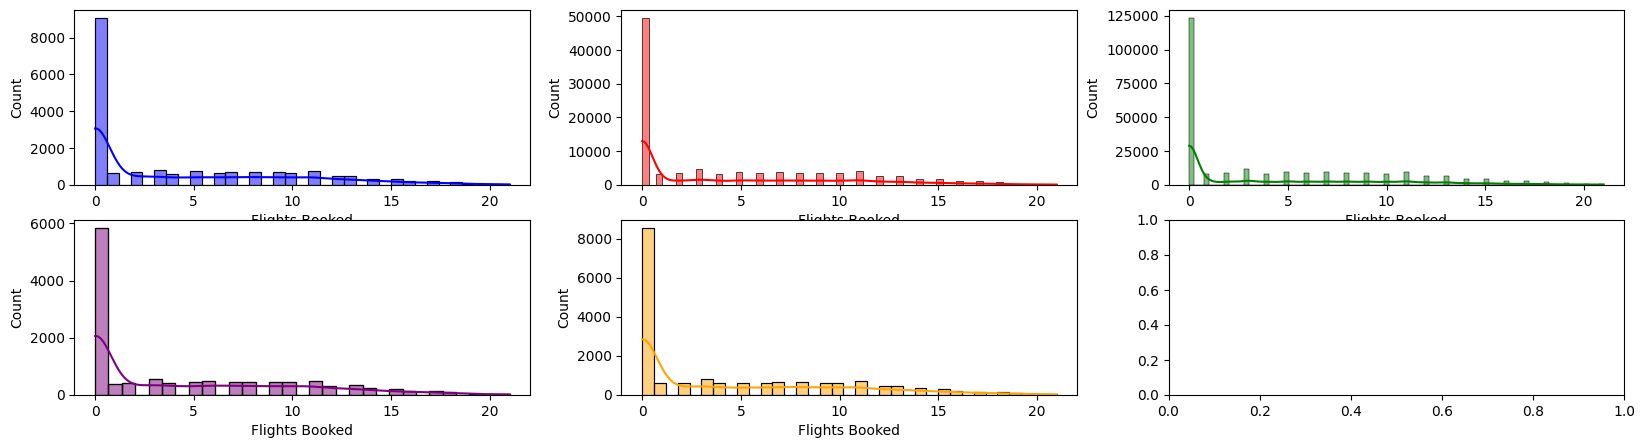

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,5))

sns.histplot(group_1, kde=True, color='blue', label='High School or Below Education', ax=axes[0,0])
sns.histplot(group_2, kde=True, color='red', label='College Education', ax=axes[0,1])
sns.histplot(group_3, kde=True, color='green', label='Bachelor Education', ax=axes[0,2])
sns.histplot(group_4, kde=True, color='purple', label='Master Education', ax=axes[1,0])
sns.histplot(group_5, kde=True, color='orange', label='Doctor Education', ax=axes[1,1])

#visualización de la distribución de los datos para confirmar que no sean normales


2. Test de varianza: 

H0: Las varianzas de los grupos son iguales (homogeneas).

H1: Los datos no siguen la distribución esperada.

Usar prueba LEVENE para datos no normales.

In [ ]:
# Apply Levene's test for equal variances to each pair of groups
group_names = list(groups.keys())

for i, name_1 in enumerate(group_names):
    for j in range(i + 1, len(group_names)):
        # Prueba Levene
        stat, p_value = stats.levene(groups[name_1], groups[group_names[j]])

        # Interpretar resultado
        if p_value > 0.05:
            print(f"Prueba Levene entre {name_1} y {group_names[j]}: Varianzas homogéneas (p={p_value})")
        else:
            print(f"Prueba Levene entre {name_1} and {group_names[j]}: Varianzas no homogéneas (p={p_value})")



Prueba Levene entre High School or Below y College: Varianzas homogéneas (p=0.9501570166570465)
Prueba Levene entre High School or Below y Bachelor: Varianzas homogéneas (p=0.15885011933211834)
Prueba Levene entre High School or Below y Master: Varianzas homogéneas (p=0.7432687346092481)
Prueba Levene entre High School or Below y Doctor: Varianzas homogéneas (p=0.9260998171810273)
Prueba Levene entre College and Bachelor: Varianzas no homogéneas (p=0.00273446183779272)
Prueba Levene entre College y Master: Varianzas homogéneas (p=0.7302345888493271)
Prueba Levene entre College y Doctor: Varianzas homogéneas (p=0.9533429624423602)
Prueba Levene entre Bachelor y Master: Varianzas homogéneas (p=0.11827519458680273)
Prueba Levene entre Bachelor y Doctor: Varianzas homogéneas (p=0.13559339317729413)
Prueba Levene entre Master y Doctor: Varianzas homogéneas (p=0.8104207838837443)


3. Aplico el test estadistico Mann Whitney. Es el test que hay que usar para datos con la distribución no normal, independiente de varianza.

H0: Hipotesis Nula: No hay diferencia significativa entre los grupos.

H1: Hipotesis Alternativa: Hay diferencia significativa entre los grupos. 


In [ ]:
# Mann-Whitney U Test para cada pareja de grupos. No depende del resultado de la Prueba de Levene
for i, name_1 in enumerate(group_names):
    for j in range(i + 1, len(group_names)):
        # Realizar Prueba Mann-Whitney
        t_stat, p_value = stats.mannwhitneyu(groups[name_1], groups[group_names[j]])

        # Interpretar el resultado
        if p_value > 0.05:
            print(f"Prueba Mann-Whitney entre {name_1} y {group_names[j]}: No hay diferencia significativa. (p={p_value})")
        else:
            print(f"Mann-Whitney U Test between {name_1} and {group_names[j]}: Hay diferencia significativa (p={p_value})")


Prueba Mann-Whitney entre High School or Below y College: No hay diferencia significativa. (p=0.575742751816062)
Mann-Whitney U Test between High School or Below and Bachelor: Hay diferencia significativa (p=0.036000727159277525)
Prueba Mann-Whitney entre High School or Below y Master: No hay diferencia significativa. (p=0.5556798765637352)
Prueba Mann-Whitney entre High School or Below y Doctor: No hay diferencia significativa. (p=0.78955580160671)
Mann-Whitney U Test between College and Bachelor: Hay diferencia significativa (p=0.002278100128804696)
Prueba Mann-Whitney entre College y Master: No hay diferencia significativa. (p=0.23837842894303352)
Prueba Mann-Whitney entre College y Doctor: No hay diferencia significativa. (p=0.8395531886114369)
Mann-Whitney U Test between Bachelor and Master: Hay diferencia significativa (p=0.014056962299193064)
Prueba Mann-Whitney entre Bachelor y Doctor: No hay diferencia significativa. (p=0.09460787010212152)
Prueba Mann-Whitney entre Master y D

In [ ]:
"""
#group_1a= df_filtered[(df_filtered['Education'] == 'High School or Below') | (df_filtered['Education'] == 'College')]['Flights Booked']
#group_2a=df_filtered[(df_filtered['Education'] == 'Bachelor') | (df_filtered['Education'] == 'Master') | (df_filtered['Education'] == 'Doctor')]['Flights Booked']
if len(group_1a) > 50:
    p_value = stats.kstest(group_1a, 'norm').pvalue  # Kolmogorov-Smirnov for large samples
else:
    p_value = stats.shapiro(group_1a).pvalue  # Shapiro-Wilk for small samples

    # Interpretar resultado
if p_value > 0.05:
    print(f"{name}: Valores normales (p={p_value:.10f})")
else:
    print(f"{name}: Valores no normales (p={p_value:.10f})")

    test que realicé con Yanelis en soporte

    """